# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 2: Simple Pendulum - Expansion DLC: Double Pendulum
## 02.19.2019

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats
from matplotlib.animation import FuncAnimation
import time
import imageio
import os, shutil

In [5]:
from matplotlib.patches import Circle

In [6]:
sns.set_style(style='whitegrid')

In [7]:
#url: https://ir.canterbury.ac.nz/bitstream/handle/10092/12659/chen_2008_report.pdf

In [325]:
# -------- PRIMARY PARAMETERS --------
# Masses of pendulums m_1, m_2
m_1 = 1
m_2 = 1
# Length of pendulums L_1, L_2
L_1 = 1
L_2 = 1
# Damping coefficients q_1, q_2
q_1 = 0
q_2 = 0
# Driving frequencies Omega_D_1, Omega_D_2
Omega_D_1 = 30
Omega_D_2 = 30
Omega_D_1 *= np.pi/180
Omega_D_2 *= np.pi/180
# Driving amplitudes F_D_1, F_D_2
F_D_1 = 4
F_D_2 = 4
# Theta(0)
theta_1 = 130
theta_2 = 80
theta_1 *= np.pi/180
theta_2 *= np.pi/180
# Omega(ω)
omega_1 = 0
omega_2 = 0

# Integration time t_iteration
t_iteration = 30
# Stepsize
fps = 40
dt = 1/fps


# -------- OTHERS --------
# Accuracy
accuracy = 1e-6
steps = 1
image_dpi = 150
image_format = 'pdf'
image_path = '..\\Documentation\\src\\images\\double\\'

if(F_D_1 != 0 and Omega_D_1 != 0 and q_1 != 0):
    drivemode = '_dampeddriven'
elif(F_D_1 != 0 and Omega_D_1 != 0 and q_1 == 0):
    drivemode = '_driven'
elif(F_D_1 == 0 and Omega_D_1 == 0 and q_1 != 0):
    drivemode = '_damped'
else:
    drivemode = ''
    
print("Drive mode:", drivemode)

Drive mode: _driven


In [299]:
def mode_choose(mode):
    
    current_mode = ('..\Release\pendulum_double.exe ' +
                    mode + ' ' +
                    str(m_1) + ' ' +
                    str(m_2) + ' ' +
                    str(L_1) + ' ' +
                    str(L_2) + ' ' +
                    str(q_1) + ' ' +
                    str(q_2) + ' ' +
                    str(Omega_D_1) + ' ' +
                    str(Omega_D_2) + ' ' +
                    str(F_D_1) + ' ' +
                    str(F_D_2) + ' ' +
                    str(theta_1) + ' ' +
                    str(theta_2) + ' ' +
                    str(omega_1) + ' ' +
                    str(omega_2) + ' ' +
                    str(t_iteration) + ' ' +
                    str(dt) + ' ' +
                    str(accuracy)
                )
    
    return(current_mode)

In [300]:
mode_runge = mode_choose(mode='runge')
mode_rkck = mode_choose(mode='rkck')
mode_euler = mode_choose(mode='euler')
mode_cromer = mode_choose(mode='eulercromer')

In [301]:
os.system(mode_runge)
data_runge = np.genfromtxt('pendulum_double.dat')
coordinates_runge = np.genfromtxt('pendulum_double_coords.dat')

os.system(mode_rkck)
data_rkck = np.genfromtxt('pendulum_double.dat')
coordinates_rkck = np.genfromtxt('pendulum_double_coords.dat')

'''os.system(mode_euler)
data_euler = np.genfromtxt('pendulum_double.dat')

os.system(mode_cromer)
data_eulercromer = np.genfromtxt('pendulum_double.dat')''';

# 4th-order Runge-Kutta

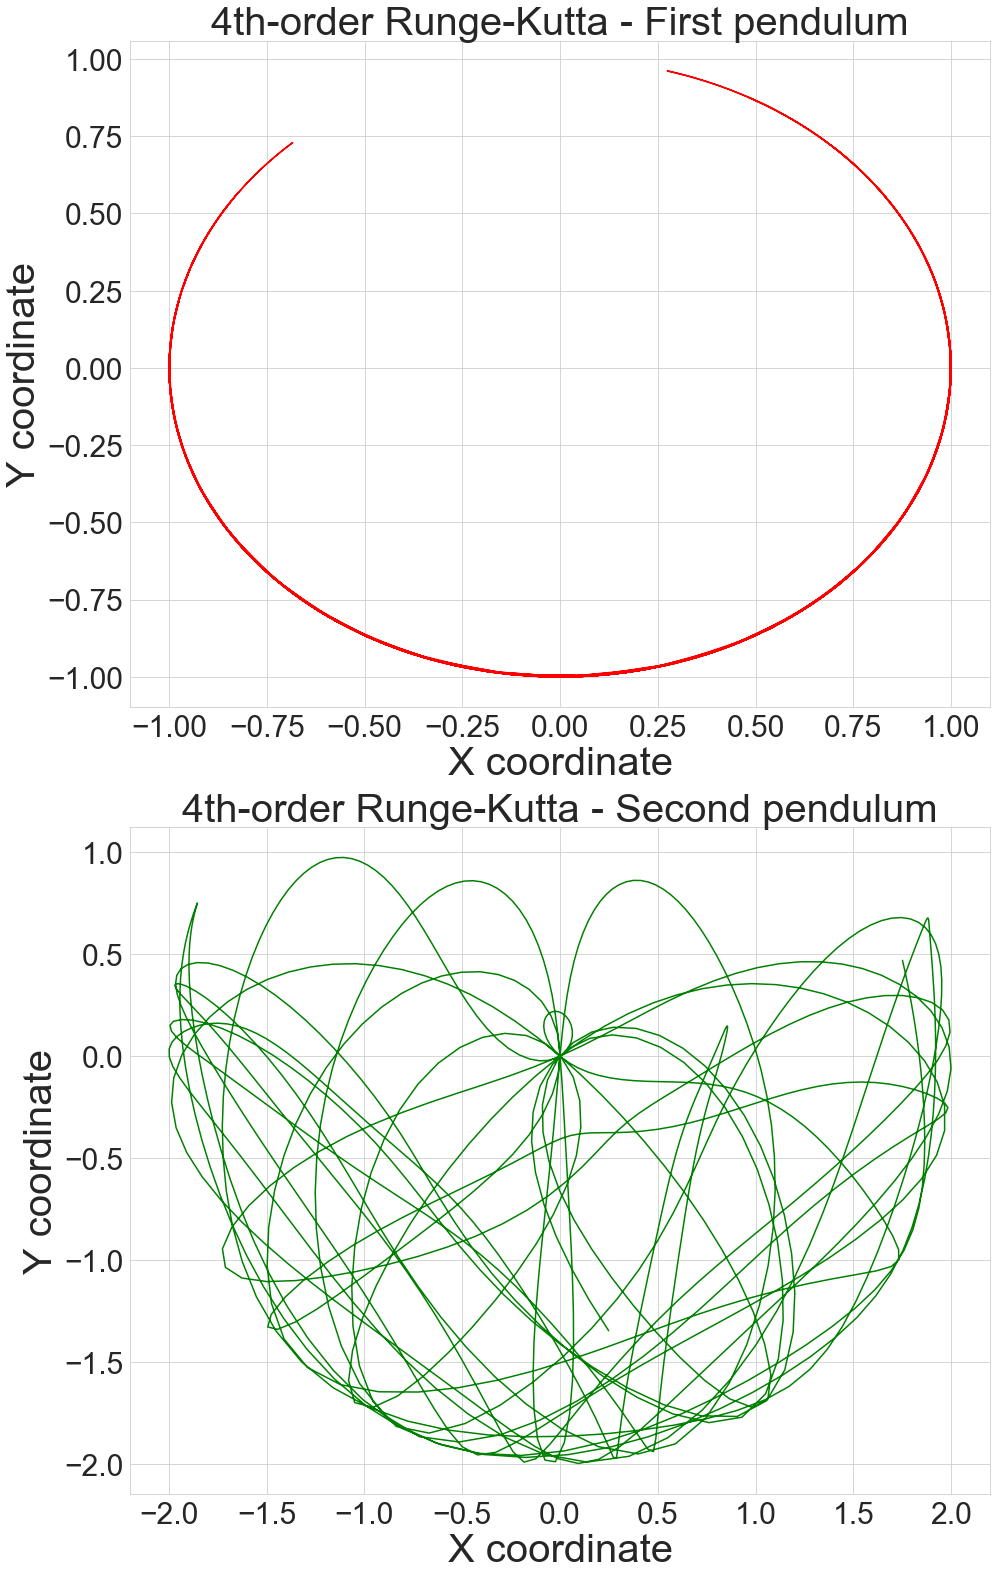

In [302]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11))

axes[0].plot(coordinates_runge[::steps,1], coordinates_runge[::steps,2], color='red')
axes[1].plot(coordinates_runge[::steps,3], coordinates_runge[::steps,4], color='green')

#axes[0].scatter(data_runge[::steps,0], data_runge[::steps,1], color='red')

axes[0].set_title('4th-order Runge-Kutta - First pendulum', fontsize=40)
axes[1].set_title('4th-order Runge-Kutta - Second pendulum', fontsize=40)

axes[0].set_xlabel('X coordinate', fontsize=40)
axes[1].set_xlabel('X coordinate', fontsize=40)

axes[0].set_ylabel('Y coordinate', fontsize=40)
axes[1].set_ylabel('Y coordinate', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path + 'trajectory_runge_double' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

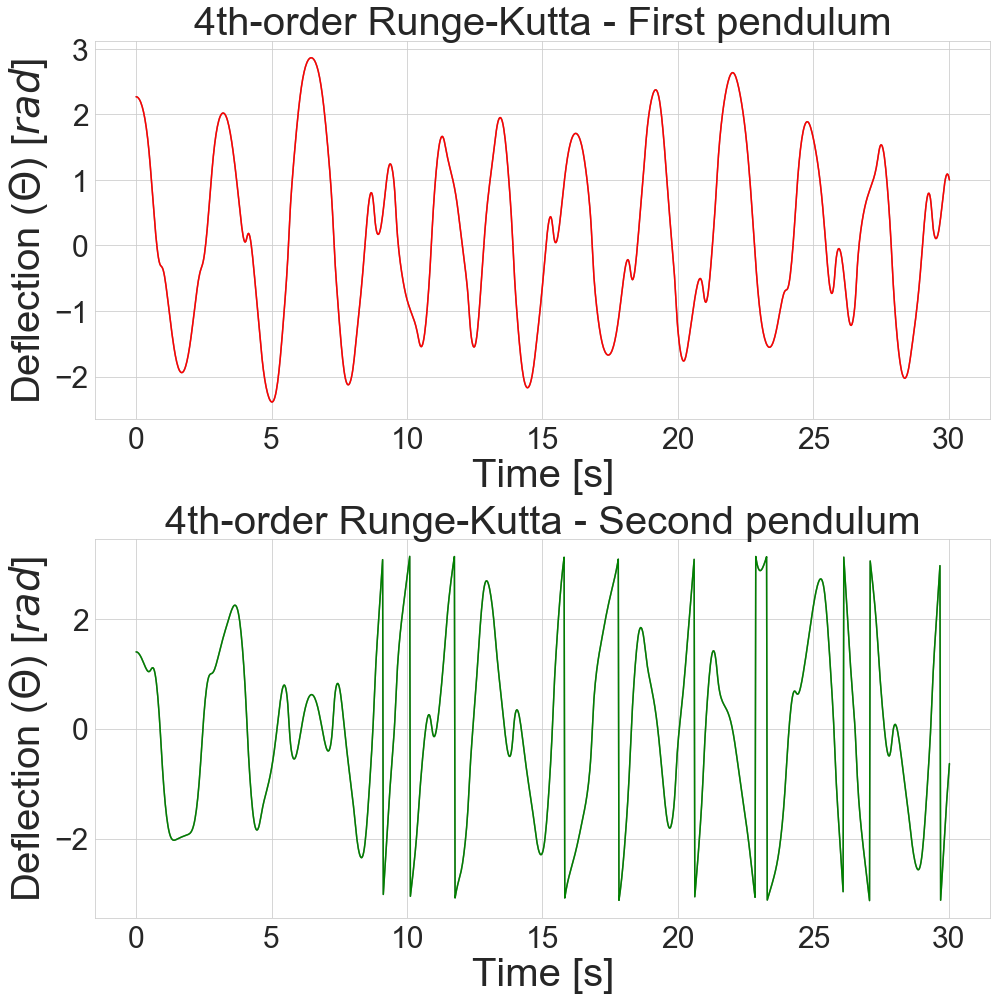

In [303]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

if(len(data_runge[::steps,0]) < 1500):
    axes[0].plot(data_runge[::steps,0], data_runge[::steps,1], color='grey')
    axes[1].plot(data_runge[::steps,0], data_runge[::steps,3], color='grey')

axes[0].plot(data_runge[::steps,0], data_runge[::steps,1], color='red')
axes[1].plot(data_runge[::steps,0], data_runge[::steps,3], color='green')

axes[0].set_title('4th-order Runge-Kutta - First pendulum', fontsize=40)
axes[1].set_title('4th-order Runge-Kutta - Second pendulum', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path + 'theta_omega_runge_double' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

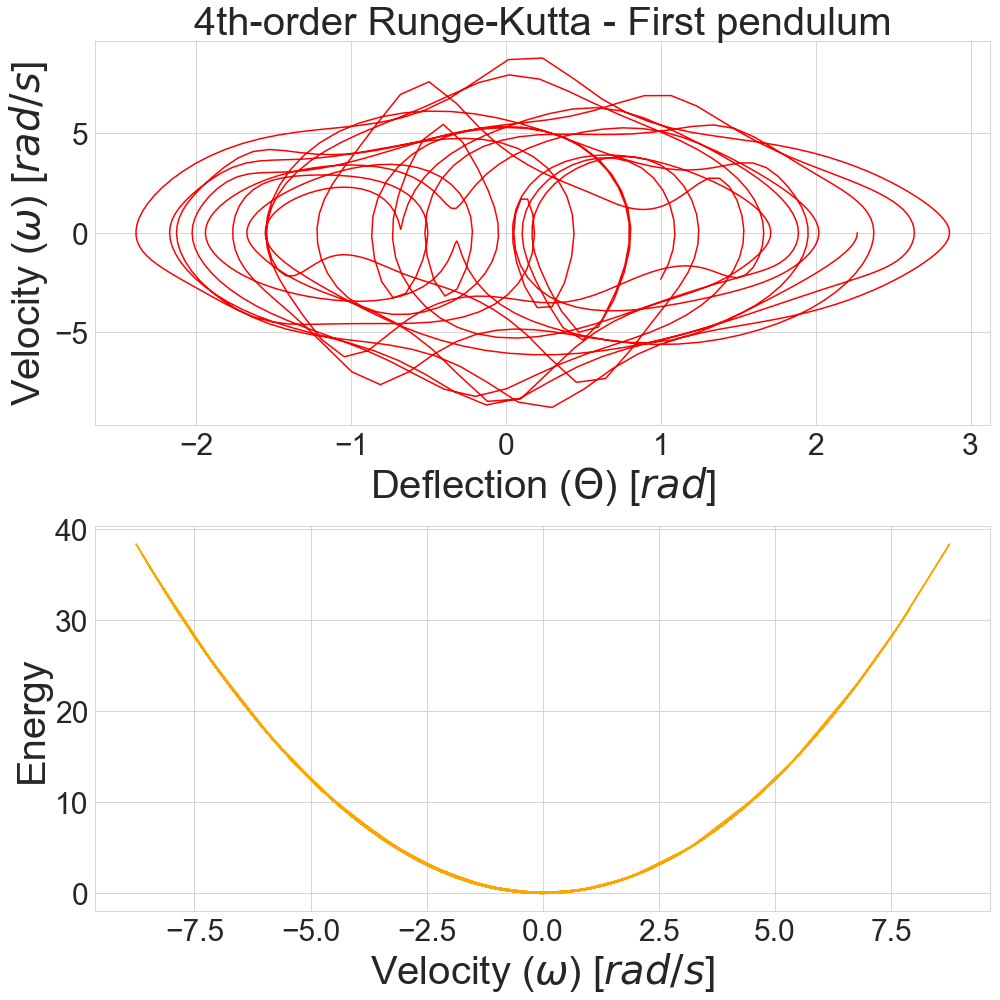

In [304]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_runge[::steps,1], data_runge[::steps,2], color='red')
axes[1].plot(data_runge[::steps,2], data_runge[::steps,6], color='orange')

axes[0].set_title('4th-order Runge-Kutta - First pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path + 'phase_energy_runge_double_first' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

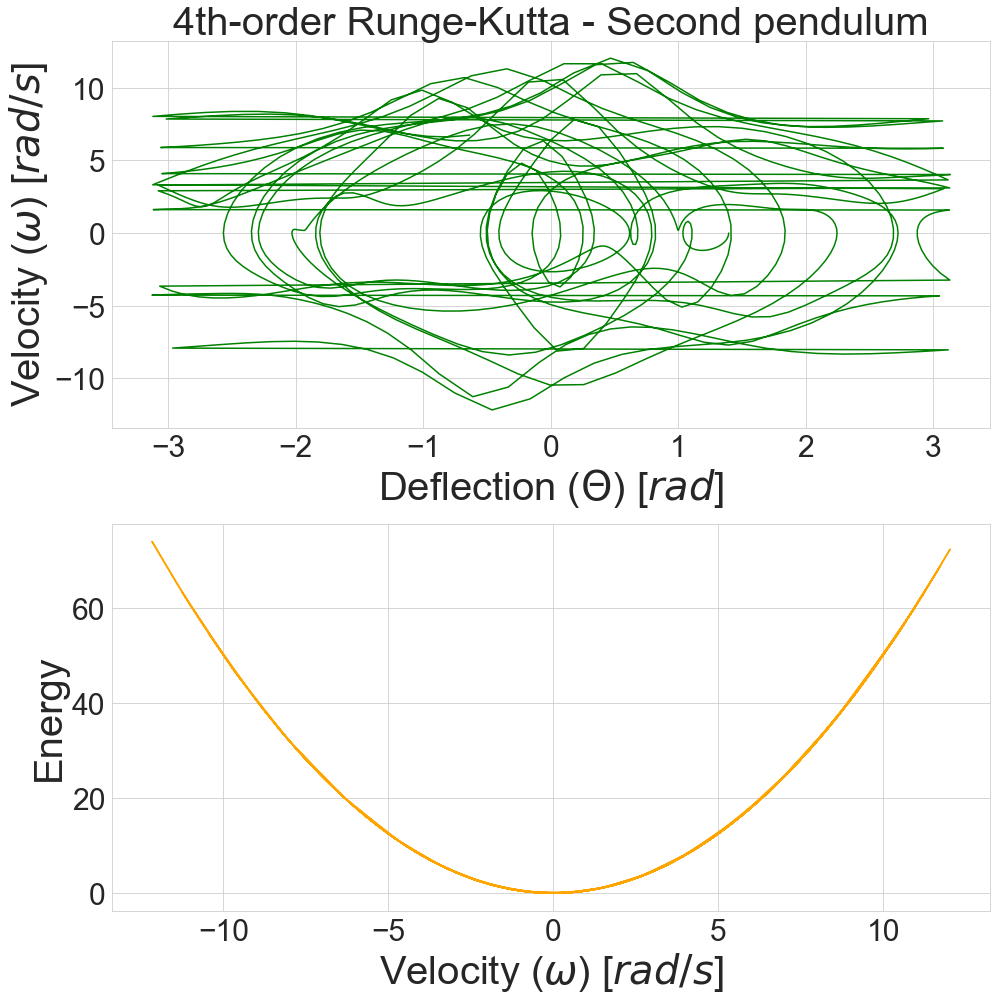

In [305]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_runge[::steps,3], data_runge[::steps,4], color='green')
axes[1].plot(data_runge[::steps,4], data_runge[::steps,7], color='orange')

axes[0].set_title('4th-order Runge-Kutta - Second pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path + 'phase_energy_runge_double_second' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

# Runge-Kutta-Cash-Karp

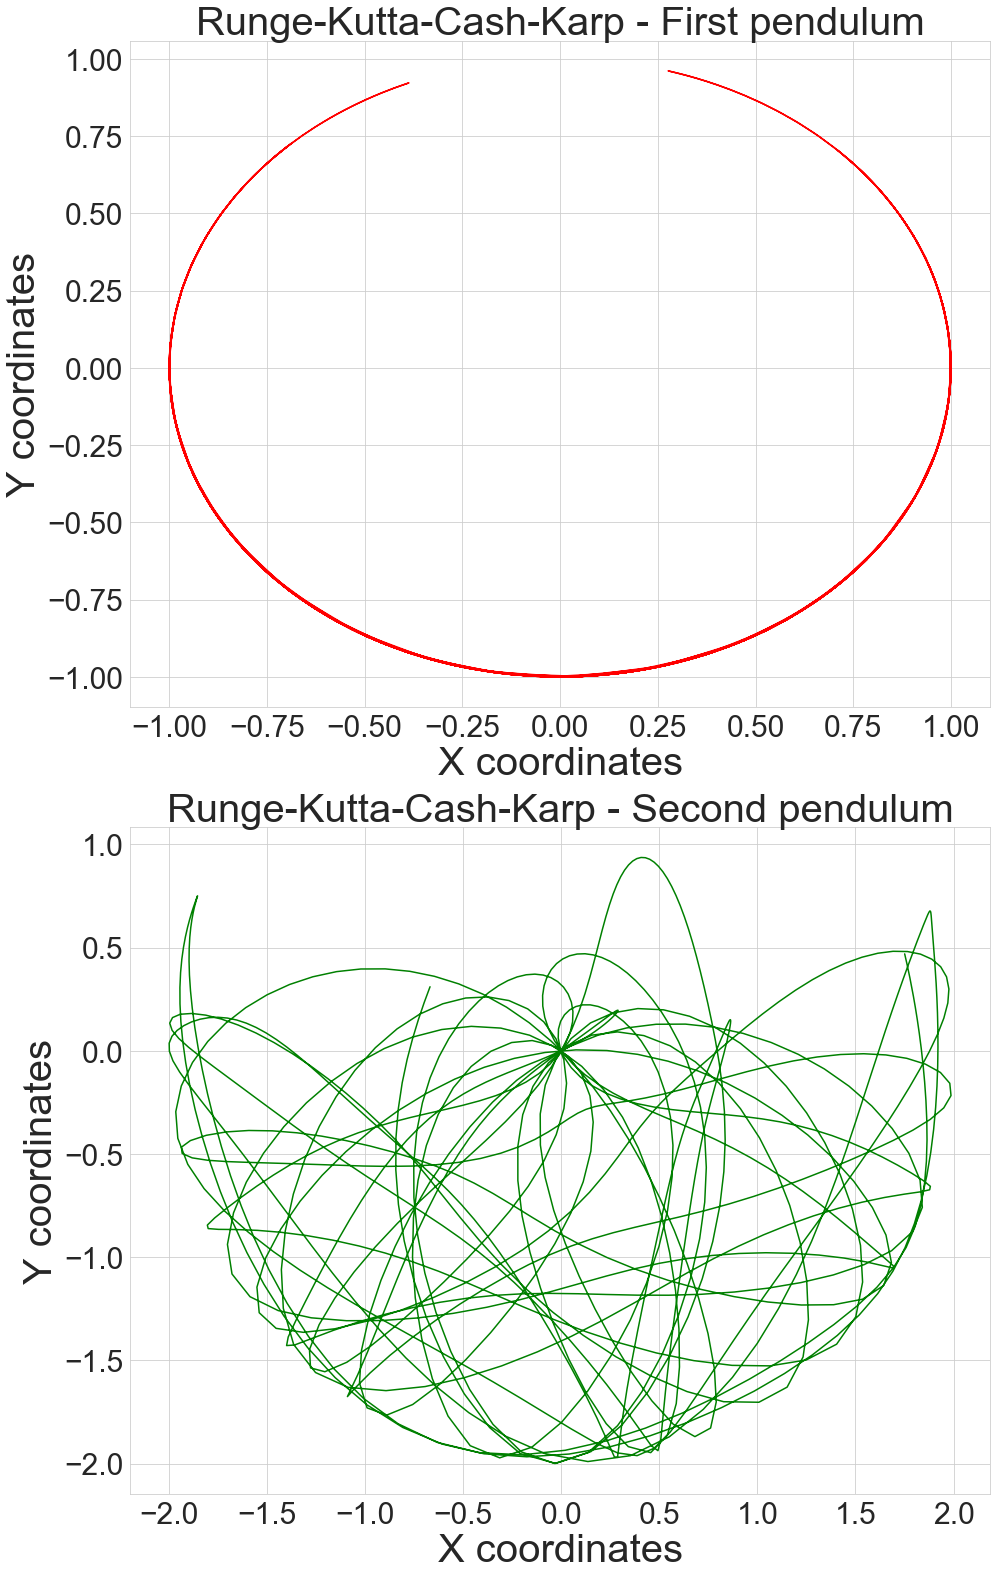

In [306]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11))

axes[0].plot(coordinates_rkck[::steps,1], coordinates_rkck[::steps,2], color='red')
axes[1].plot(coordinates_rkck[::steps,3], coordinates_rkck[::steps,4], color='green')

axes[0].set_title('Runge-Kutta-Cash-Karp - First pendulum', fontsize=40)
axes[1].set_title('Runge-Kutta-Cash-Karp - Second pendulum', fontsize=40)

axes[0].set_xlabel('X coordinates', fontsize=40)
axes[1].set_xlabel('X coordinates', fontsize=40)

axes[0].set_ylabel('Y coordinates', fontsize=40)
axes[1].set_ylabel('Y coordinates', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path + 'trajectory_rkck_double' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

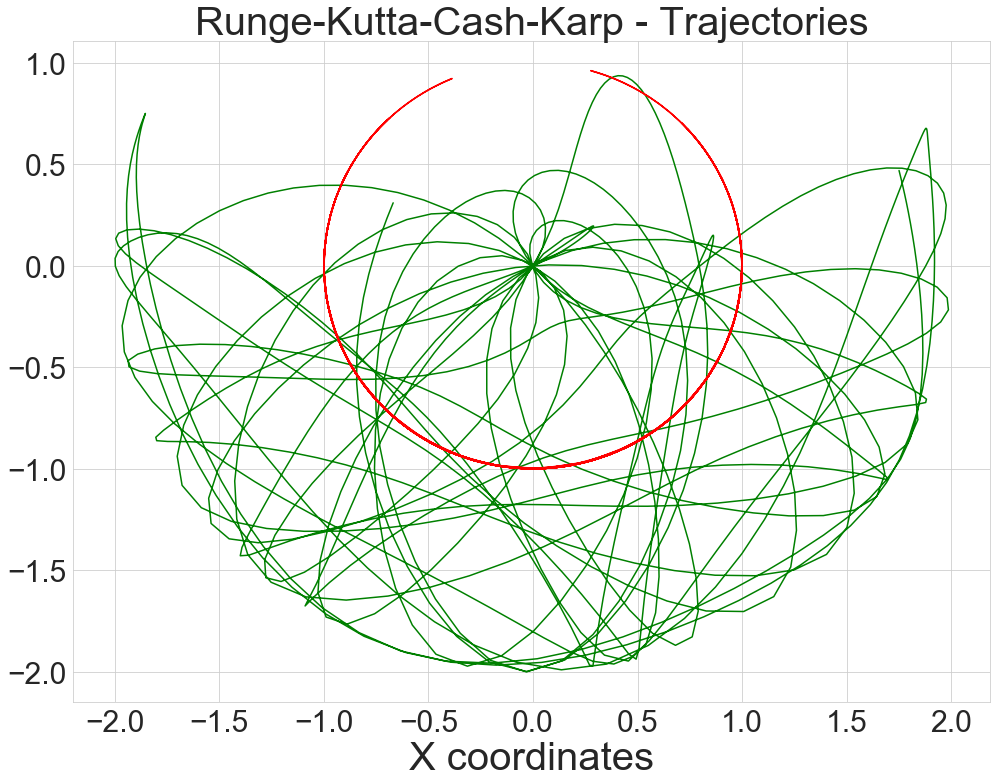

In [307]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11))

axes.plot(coordinates_rkck[::steps,3], coordinates_rkck[::steps,4], color='green')
axes.plot(coordinates_rkck[::steps,1], coordinates_rkck[::steps,2], color='red')

axes.set_title('Runge-Kutta-Cash-Karp - Trajectories', fontsize=40)

axes.set_xlabel('X coordinates', fontsize=40)
axes.set_xlabel('X coordinates', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path + 'trajectory_both_rkck_double' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

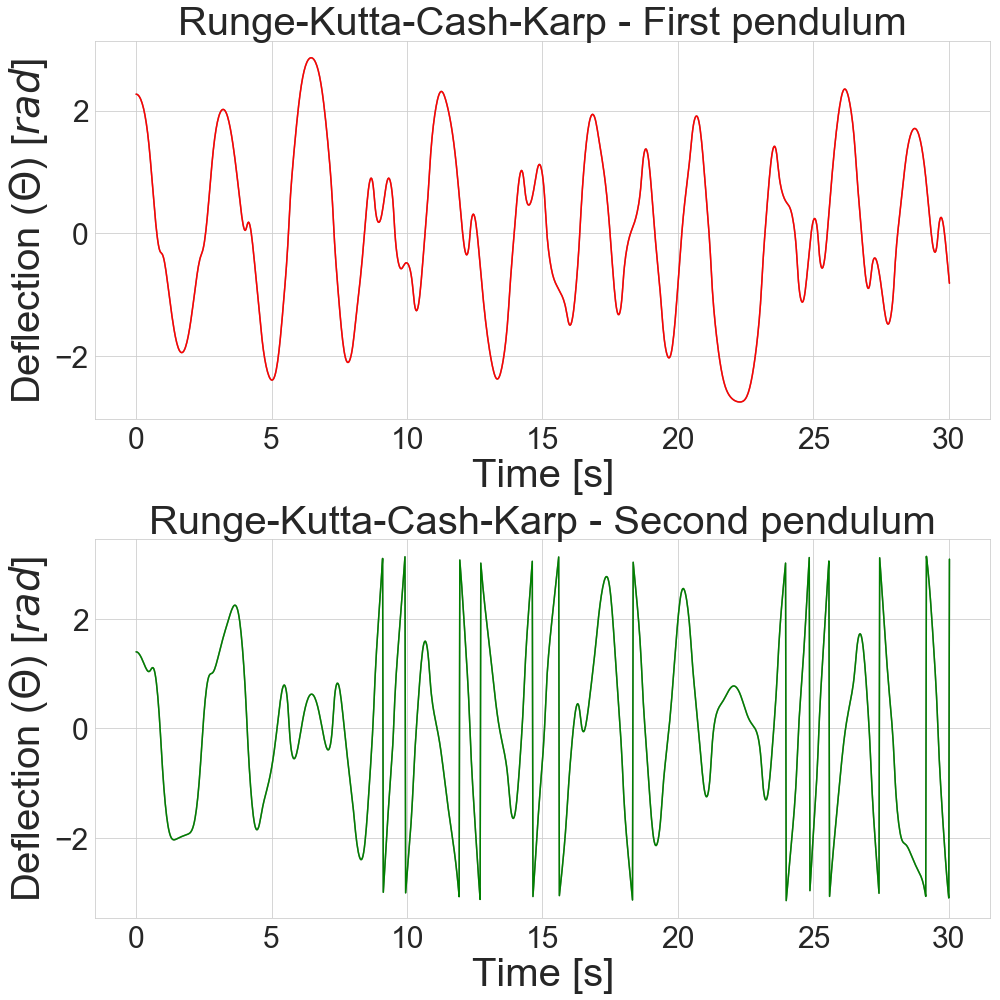

In [308]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

if(len(data_rkck[::steps,0]) < 1500):
    axes[0].plot(data_rkck[::steps,0], data_rkck[::steps,1], color='grey')
    axes[1].plot(data_rkck[::steps,0], data_rkck[::steps,3], color='grey')

axes[0].plot(data_rkck[::steps,0], data_rkck[::steps,1], color='red')
axes[1].plot(data_rkck[::steps,0], data_rkck[::steps,3], color='green')

axes[0].set_title('Runge-Kutta-Cash-Karp - First pendulum', fontsize=40)
axes[1].set_title('Runge-Kutta-Cash-Karp - Second pendulum', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path + 'theta_omega_rkck_double' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

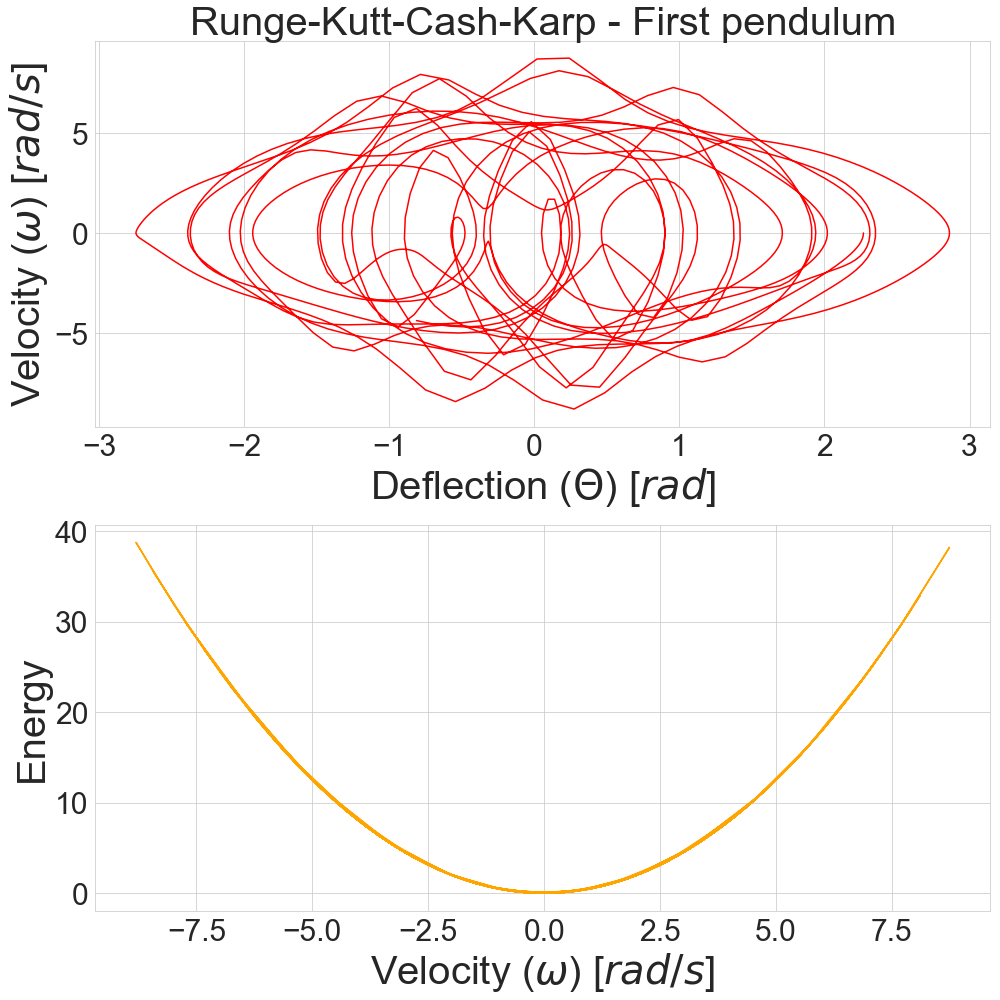

In [309]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_rkck[::steps,1], data_rkck[::steps,2], color='red')
axes[1].plot(data_rkck[::steps,2], data_rkck[::steps,6], color='orange')

axes[0].set_title('Runge-Kutt-Cash-Karp - First pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path + 'phase_energy_rkck_double_first' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

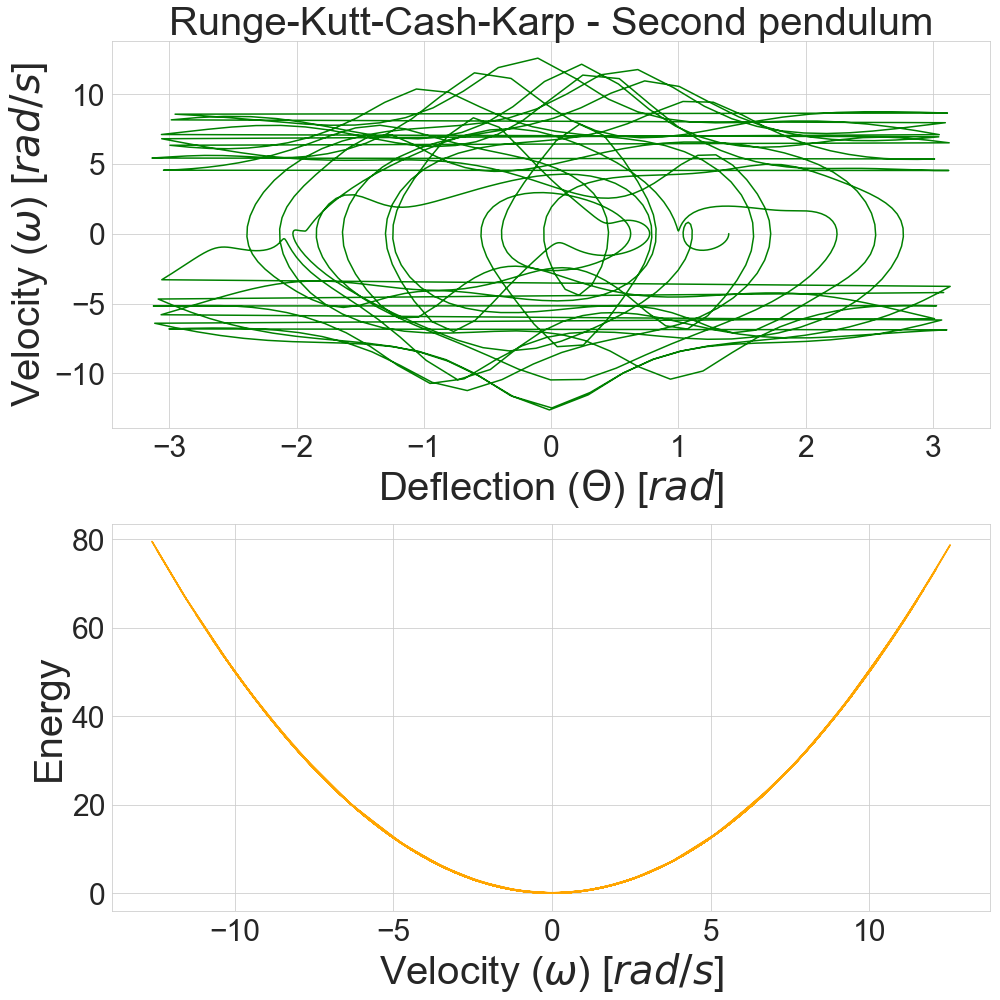

In [310]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_rkck[::steps,3], data_rkck[::steps,4], color='green')
axes[1].plot(data_rkck[::steps,4], data_rkck[::steps,7], color='orange')

axes[0].set_title('Runge-Kutt-Cash-Karp - Second pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path + 'phase_energy_rkck_double_second' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

# Comparsion ok RK4 and RKCK

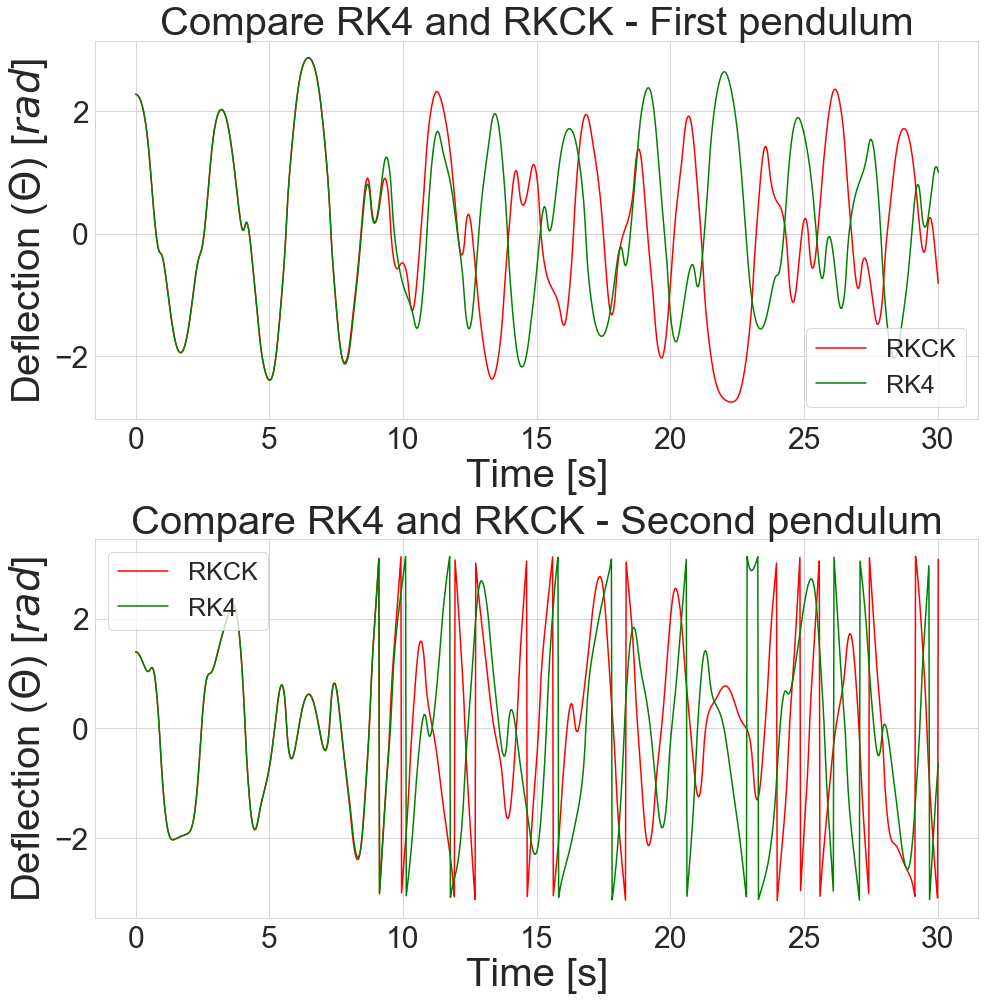

In [311]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_rkck[::steps,0], data_rkck[::steps,1], color='red', label='RKCK')
axes[0].plot(data_runge[::steps,0], data_runge[::steps,1], color='green', label='RK4')
axes[1].plot(data_rkck[::steps,0], data_rkck[::steps,3], color='red', label='RKCK')
axes[1].plot(data_runge[::steps,0], data_runge[::steps,3], color='green', label='RK4')

axes[0].set_title('Compare RK4 and RKCK - First pendulum', fontsize=40)
axes[1].set_title('Compare RK4 and RKCK - Second pendulum', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

axes[0].legend(fontsize=25)
axes[1].legend(fontsize=25)
fig.tight_layout()
plt.savefig(image_path + 'compare_rk4_rkck_theta_omega' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

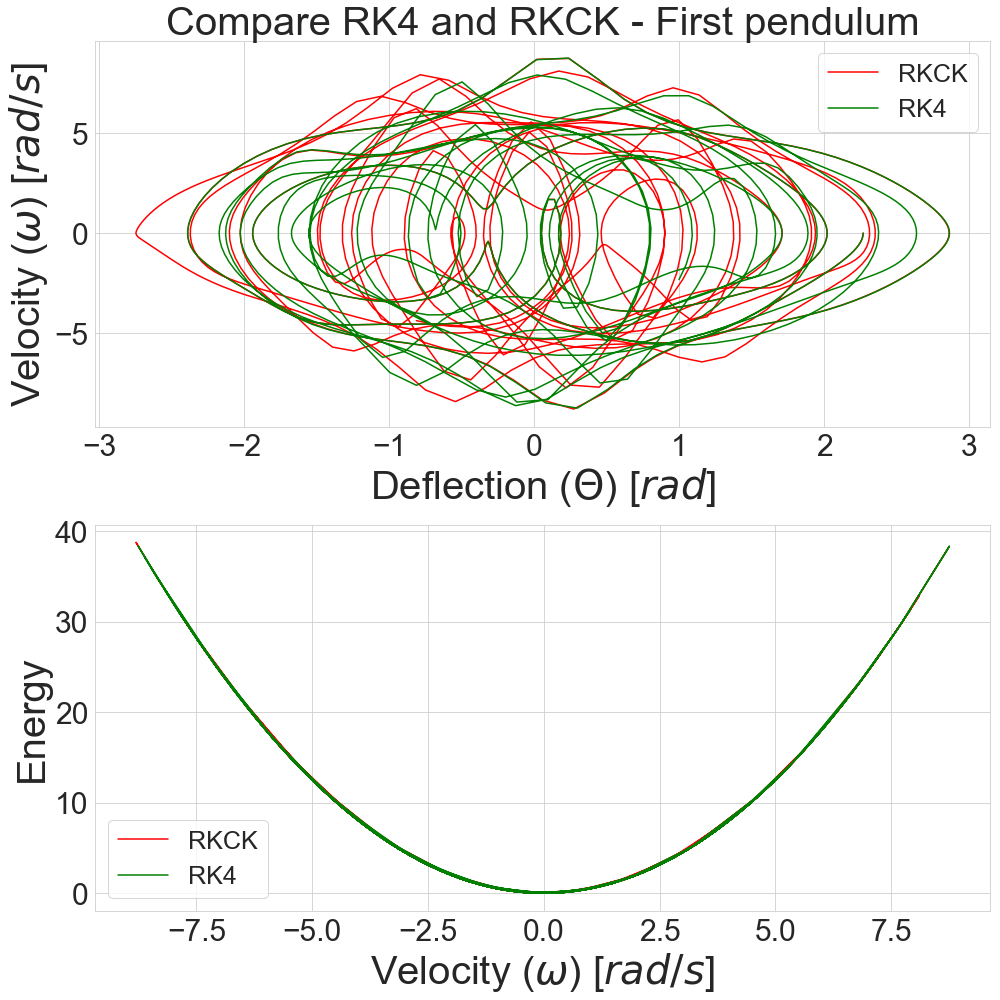

In [312]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_rkck[::steps,1], data_rkck[::steps,2], color='red', label='RKCK')
axes[0].plot(data_runge[::steps,1], data_runge[::steps,2], color='green', label='RK4')
axes[1].plot(data_rkck[::steps,2], data_rkck[::steps,6], color='red', label='RKCK')
axes[1].plot(data_runge[::steps,2], data_runge[::steps,6], color='green', label='RK4')

axes[0].set_title('Compare RK4 and RKCK - First pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

axes[0].legend(fontsize=25)
axes[1].legend(fontsize=25)
fig.tight_layout()
plt.savefig(image_path + 'compare_rk4_rkck_phase_energy_first' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

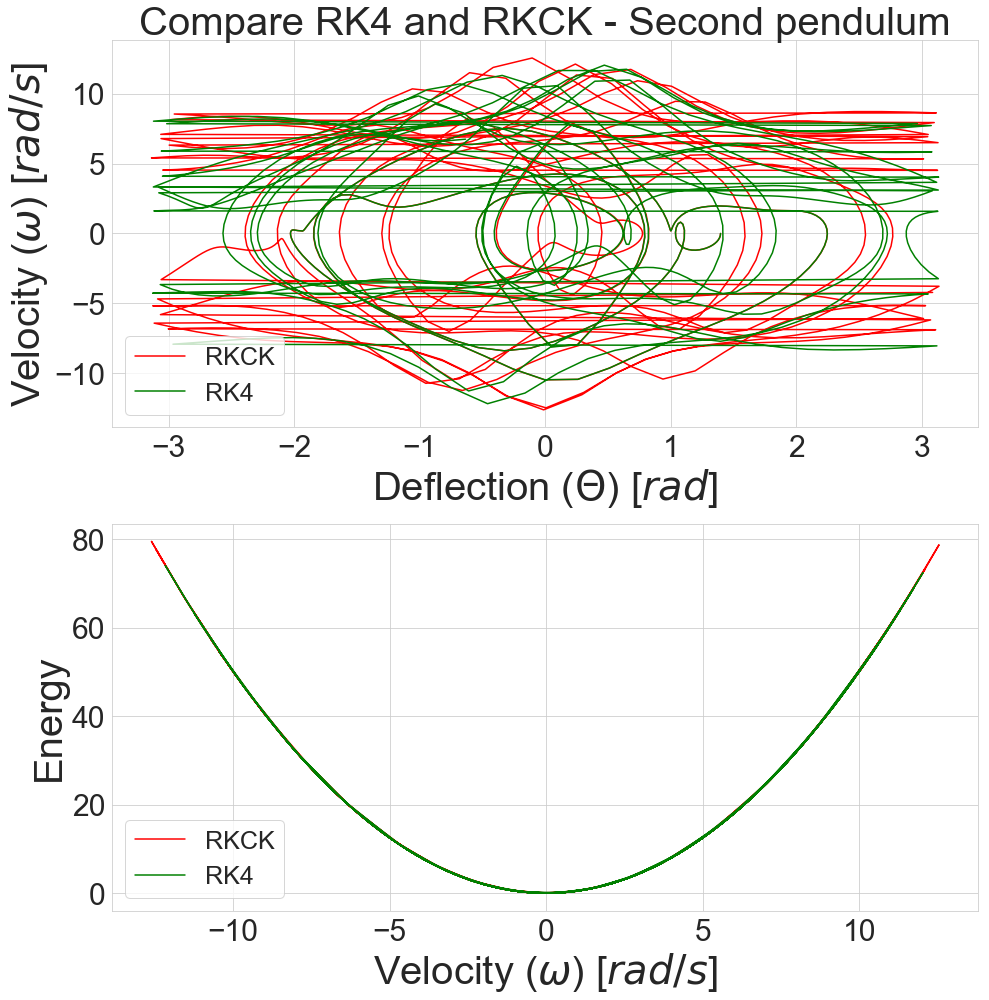

In [313]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_rkck[::steps,3], data_rkck[::steps,4], color='red', label='RKCK')
axes[0].plot(data_runge[::steps,3], data_runge[::steps,4], color='green', label='RK4')
axes[1].plot(data_rkck[::steps,4], data_rkck[::steps,7], color='red', label='RKCK')
axes[1].plot(data_runge[::steps,4], data_runge[::steps,7], color='green', label='RK4')

axes[0].set_title('Compare RK4 and RKCK - Second pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

axes[0].legend(fontsize=25)
axes[1].legend(fontsize=25)
fig.tight_layout()
plt.savefig(image_path + 'compare_rk4_rkck_phase_energy_second' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

# Compare numerous runs of RK4

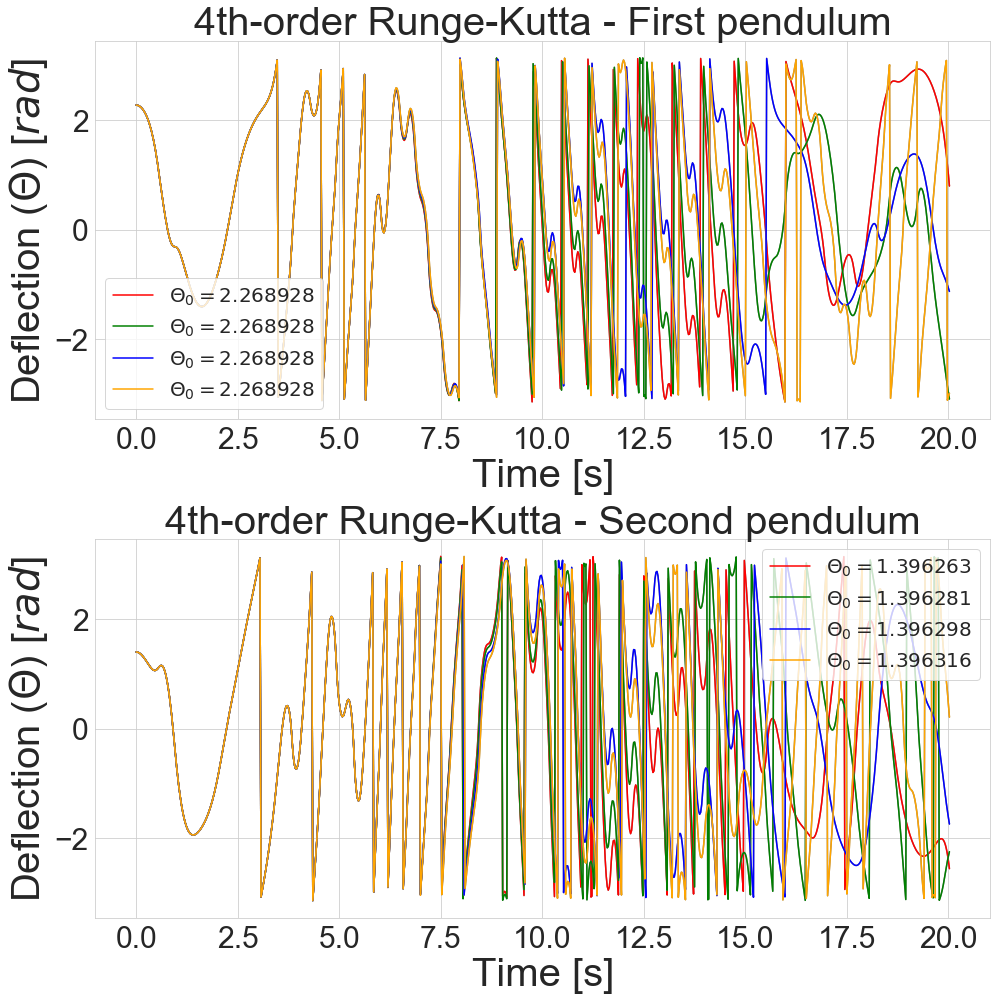

In [326]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

iterations = 4
theta_temp = theta_2
for i in range(0, iterations):
    
    theta_2 += i * np.pi/180 * 1e-03
    t_iteration = 20
    mode_runge_runs = mode_choose(mode='runge')
    os.system(mode_runge_runs)
    data_runge_runs = np.genfromtxt('pendulum_double.dat')
    
    color = ['red', 'green', 'blue', 'orange']
    
    if(len(data_rkck_runs[::steps,0]) < 1500):
        axes[0].plot(data_runge_runs[::steps,0], data_runge_runs[::steps,1], color='grey')
        axes[1].plot(data_runge_runs[::steps,0], data_runge_runs[::steps,3], color='grey')

    axes[0].plot(data_runge_runs[::steps,0], data_runge_runs[::steps,1], color=color[i], label='$\Theta_0 = {0:.6f}$'.format(theta_1))
    axes[1].plot(data_runge_runs[::steps,0], data_runge_runs[::steps,3], color=color[i], label='$\Theta_0 = {0:.6f}$'.format(theta_2))
    
    theta_2 = theta_temp

axes[0].set_title('4th-order Runge-Kutta - First pendulum', fontsize=40)
axes[1].set_title('4th-order Runge-Kutta - Second pendulum', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
axes[0].legend(fontsize=20)
axes[1].legend(fontsize=20)
plt.savefig(image_path + 'chaotic_runge_double_diff' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

# Compare numerous runs of RKCK

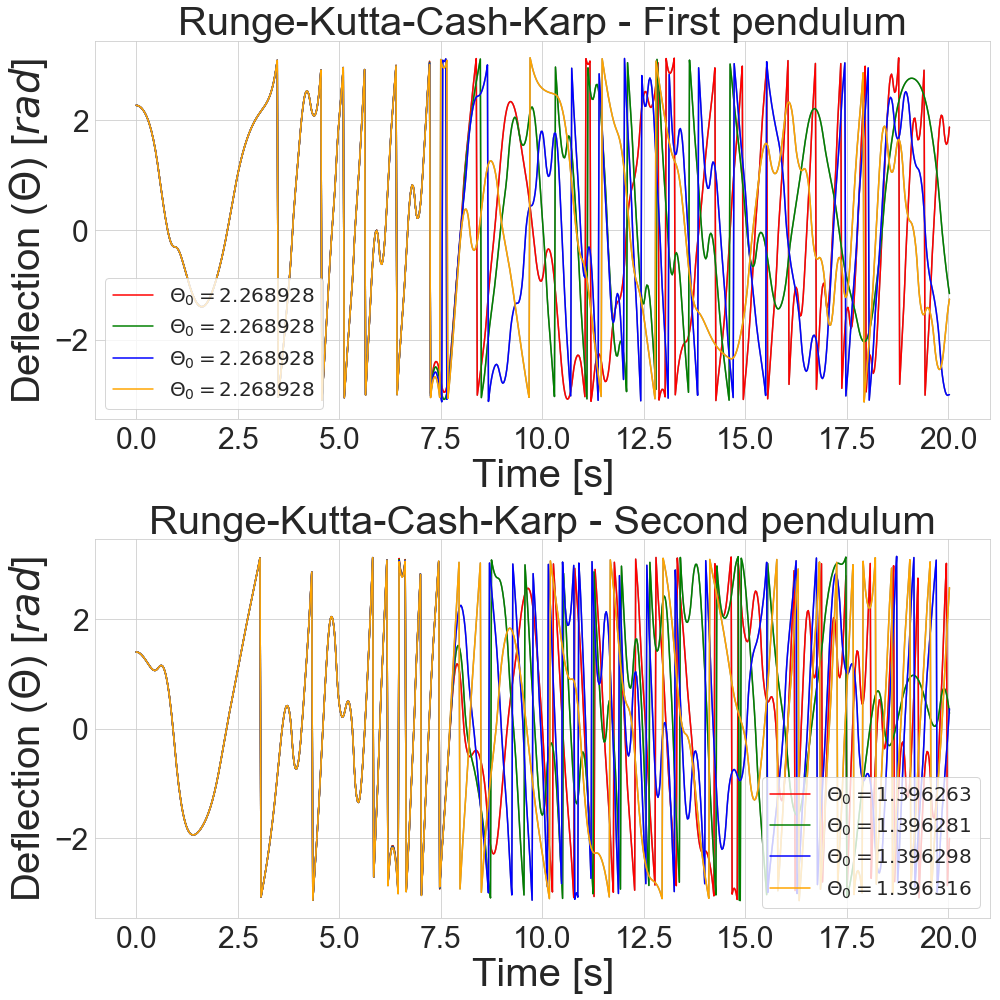

In [327]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

iterations = 4
thete_temp = theta_2
for i in range(0, iterations):
    
    theta_2 += i * np.pi/180 * 1e-03
    t_iteration = 20
    mode_rkck_runs = mode_choose(mode='rkck')
    os.system(mode_rkck_runs)
    data_rkck_runs = np.genfromtxt('pendulum_double.dat')
    
    color = ['red', 'green', 'blue', 'orange']
    
    if(len(data_rkck_runs[::steps,0]) < 1500):
        axes[0].plot(data_rkck_runs[::steps,0], data_rkck_runs[::steps,1], color='grey')
        axes[1].plot(data_rkck_runs[::steps,0], data_rkck_runs[::steps,3], color='grey')

    axes[0].plot(data_rkck_runs[::steps,0], data_rkck_runs[::steps,1], color=color[i], label='$\Theta_0 = {0:.6f}$'.format(theta_1))
    axes[1].plot(data_rkck_runs[::steps,0], data_rkck_runs[::steps,3], color=color[i], label='$\Theta_0 = {0:.6f}$'.format(theta_2))
    
    theta_2 = thete_temp

axes[0].set_title('Runge-Kutta-Cash-Karp - First pendulum', fontsize=40)
axes[1].set_title('Runge-Kutta-Cash-Karp - Second pendulum', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
axes[0].legend(fontsize=20)
axes[1].legend(fontsize=20)
plt.savefig(image_path + 'chaotic_rkck_double_diff' + drivemode + '.' + image_format, format=image_format, dpi=image_dpi, bbox_inches='tight')
plt.show()

# Animation

In [90]:
def ANIMATE_VIDEO(path, video_title, mode):

    if(mode=='both'):
        video_title = 'double_pendulum_both.mp4'
        nrows=1
        ncols=1
        
    elif(mode=='compare'):
        video_title = 'double_pendulum_compare.mp4'
        nrows=1
        ncols=2
        
    else:
        nrows=1
        ncols=1
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14,nrows*14))

    
    if(mode=='rkck'):
        x1 = coordinates_rkck[::steps,1]
        y1 = coordinates_rkck[::steps,2]
        x2 = coordinates_rkck[::steps,3]
        y2 = coordinates_rkck[::steps,4]

    elif(mode=='runge'):
        x1 = coordinates_runge[::steps,1]
        y1 = coordinates_runge[::steps,2]
        x2 = coordinates_runge[::steps,3]
        y2 = coordinates_runge[::steps,4]
        
    elif(mode=='both' or mode=='compare'):
        x1_rkck = coordinates_rkck[::steps,1]
        y1_rkck = coordinates_rkck[::steps,2]
        x2_rkck = coordinates_rkck[::steps,3]
        y2_rkck = coordinates_rkck[::steps,4]

        x1_runge = coordinates_runge[::steps,1]
        y1_runge = coordinates_runge[::steps,2]
        x2_runge = coordinates_runge[::steps,3]
        y2_runge = coordinates_runge[::steps,4]

    # Pendulum's circle size
    r_1 = 0.05 * np.power(m_1, 1/3)
    r_2 = 0.05 * np.power(m_2, 1/3)
    r = max(r_1, r_2)
    # Plot a trail of the m2 bob's position for the last trail_secs seconds.
    trail_secs = 1
    # This corresponds to max_trail time points.
    max_trail = int(trail_secs / dt)

    ##ANIMATION STUFF BEGINS HERE##

    def animation(i):
            
        if(mode=='both'):
            # Centre the image on the fixed anchor point, and ensure the axes are equal
            ax.set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_aspect('equal', adjustable='box')
            
            # Plot and save an image of the double pendulum configuration for time
            # point i.
            # The pendulum rods.
            ax.plot([0, x1_rkck[i], x2_rkck[i]], [0, y1_rkck[i], y2_rkck[i]], lw=2, c='k')
            ax.plot([0, x1_runge[i], x2_runge[i]], [0, y1_runge[i], y2_runge[i]], lw=2, c='k')
            # Circles representing the anchor point of rod 1, and bobs 1 and 2.
            c0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c1_rkck = Circle((x1_rkck[i], y1_rkck[i]), r_1, fc='red', ec='red', zorder=10)
            c2_rkck = Circle((x2_rkck[i], y2_rkck[i]), r_2, fc='green', ec='green', zorder=10)
            c1_runge = Circle((x1_runge[i], y1_runge[i]), r_1, fc='blue', ec='blue', zorder=10)
            c2_runge = Circle((x2_runge[i], y2_runge[i]), r_2, fc='orange', ec='orange', zorder=10)
            ax.add_patch(c0)
            ax.add_patch(c1_rkck)
            ax.add_patch(c2_rkck)
            ax.add_patch(c1_runge)
            ax.add_patch(c2_runge)

            ax.plot(x1_rkck[0:i], y1_rkck[0:i], c='red', solid_capstyle='butt', lw=2)
            ax.plot(x2_rkck[0:i], y2_rkck[0:i], c='green', solid_capstyle='butt', lw=2)
            ax.plot(x1_runge[0:i], y1_runge[0:i], c='blue', solid_capstyle='butt', lw=2)
            ax.plot(x2_runge[0:i], y2_runge[0:i], c='orange', solid_capstyle='butt', lw=2)
            
            # Don't show axes, only white background
            ax.axis('off')
        
        elif(mode=='compare'):

            # Centre the image on the fixed anchor point, and ensure the axes are equal
            ax[0].set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax[0].set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax[0].set_aspect('equal', adjustable='box')
            
            ax[1].set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax[1].set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax[1].set_aspect('equal', adjustable='box')
            
            # Plot and save an image of the double pendulum configuration for time
            # point i.
            # The pendulum rods.
            ax[0].plot([0, x1_rkck[i], x2_rkck[i]], [0, y1_rkck[i], y2_rkck[i]], lw=2, c='k')
            ax[1].plot([0, x1_runge[i], x2_runge[i]], [0, y1_runge[i], y2_runge[i]], lw=2, c='k')
            # Circles representing the anchor point of rod 1, and bobs 1 and 2.
            c0_0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c0_1 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c1_rkck = Circle((x1_rkck[i], y1_rkck[i]), r_1, fc='red', ec='red', zorder=10)
            c2_rkck = Circle((x2_rkck[i], y2_rkck[i]), r_2, fc='green', ec='green', zorder=10)
            c1_runge = Circle((x1_runge[i], y1_runge[i]), r_1, fc='blue', ec='blue', zorder=10)
            c2_runge = Circle((x2_runge[i], y2_runge[i]), r_2, fc='orange', ec='orange', zorder=10)
            ax[0].add_patch(c0_0)
            ax[1].add_patch(c0_1)
            ax[0].add_patch(c1_rkck)
            ax[0].add_patch(c2_rkck)
            ax[1].add_patch(c1_runge)
            ax[1].add_patch(c2_runge)

            ax[0].plot(x1_rkck[0:i], y1_rkck[0:i], c='red', solid_capstyle='butt', lw=2)
            ax[0].plot(x2_rkck[0:i], y2_rkck[0:i], c='green', solid_capstyle='butt', lw=2)
            ax[1].plot(x1_runge[0:i], y1_runge[0:i], c='blue', solid_capstyle='butt', lw=2)
            ax[1].plot(x2_runge[0:i], y2_runge[0:i], c='orange', solid_capstyle='butt', lw=2)
            
            # Don't show axes, only white background
            ax[0].axis('off')
            ax[1].axis('off')
            
        else:
            # Centre the image on the fixed anchor point, and ensure the axes are equal
            ax.set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_aspect('equal', adjustable='box')
            
            # Plot and save an image of the double pendulum configuration for time
            # point i.
            # The pendulum rods.
            ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
            # Circles representing the anchor point of rod 1, and bobs 1 and 2.
            c0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c1 = Circle((x1[i], y1[i]), r_1, fc='orange', ec='orange', zorder=10)
            c2 = Circle((x2[i], y2[i]), r_2, fc='purple', ec='purple', zorder=10)
            ax.add_patch(c0)
            ax.add_patch(c1)
            ax.add_patch(c2)

            ax.plot(x1[0:i], y1[0:i], c='orange', solid_capstyle='butt', lw=2)
            ax.plot(x2[0:i], y2[0:i], c='purple', solid_capstyle='butt', lw=2)
            
            # Don't show axes, only white background
            ax.axis('off')
        
        
        plt.savefig(path + '_img{:04d}.png'.format(i), dpi=72)    # Save next frame as png
        image = imageio.imread(path + '_img{:04d}.png'.format(i)) # Load saved image
        writer.append_data(image)                                 # Append this image as the next frame to video

        # Clear the pyplot background for the next frame
        if(mode=='compare'):
            ax[0].cla()
            ax[1].cla()
        else:
            plt.cla()
            
        # Delete the now useless image from frames' folder
        os.unlink(path + '_img{:04d}.png'.format(i))

    with imageio.get_writer(video_title, fps=fps) as writer:
        if(mode=='both' or mode=='compare'):
            for i in range(0, len(x1_rkck)):
                sys.stdout.write('\r' + str(i+1) + ' / ' + str(len(x1_rkck)))
                sys.stdout.flush()
                animation(i)
        else:
            for i in range(0, len(x1)):
                sys.stdout.write('\r' + str(i+1) + ' / ' + str(len(x1)))
                sys.stdout.flush()
                animation(i)

3601 / 3601

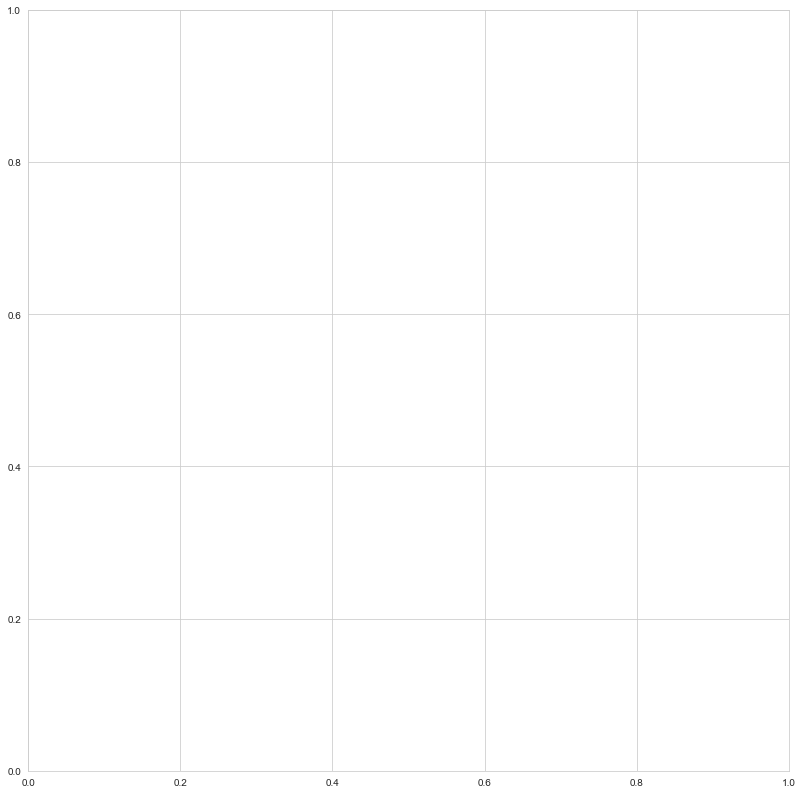

In [96]:
#ANIMATE_VIDEO(path = '.\\frames\\', video_title='double_pendulum_immensetheta.mp4', mode='rkck')